# We require to import pandas, numpy for Data estraction and EDA. Plot,Graph libraries. From sklearn we require to import accuracy_score,classification_report,confusion_matrix.Ignoring the filter warnings for cleaner output.


import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading provided data and store into a Dataframe using pandas library

In [2]:
# Reading train data using pandas read_csv library and store in dataframe

df_train=pd.read_csv('Train_data.csv')
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### From above we can confirm columns department region education gender recruitment_channel contain categorical Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### From datafram info we can confirm there is 1 float, 8 Integer, 5 object data type exist

In [4]:
# We can remove employee_id column as there is no dependency

df_train.drop('employee_id',axis=1,inplace=True)
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# We need to verify any missing values in our dataframe

df_train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

- From above we can confirm except education and previous_year_rating no other colomns has any missing values. Next we will work on missing values.

### EDA:: Missing values replacement with Mode on catagorical data

In [6]:

df_train['education'].fillna(df_train.education.mode()[0], inplace=True)

df_train['previous_year_rating'].fillna(df_train.previous_year_rating.mode()[0],inplace=True)

In [7]:
# Validate for no missing value exist in dataframe

df_train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Evaluate Univariate Analysis to confirm data value distribution

In [8]:
df_train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


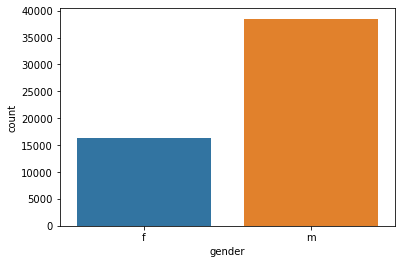

In [9]:
# Evaluate distribution of Gender column values using countplot

sns.countplot(x=df_train['gender'])
plt.show()

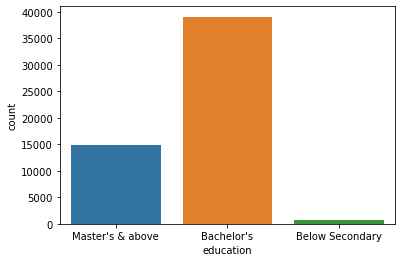

In [10]:
# Evaluate distribution of education column values using countplot

sns.countplot(x=df_train['education'])
plt.show()

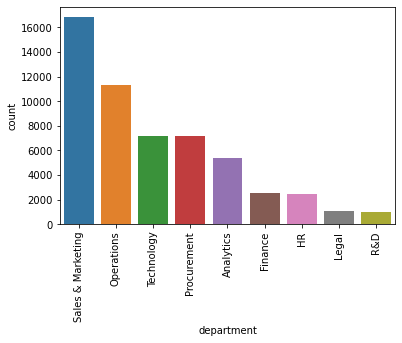

In [11]:
# Evaluate distribution of employees in each department using countplot

sns.countplot(x=df_train['department'],order=df_train['department'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### From above graph we could confirm top 3 employees count are in Sales & Marketting, Operations,Technologies
### Whereas, department of Legal, R&D have less employees

<AxesSubplot:xlabel='count', ylabel='region'>

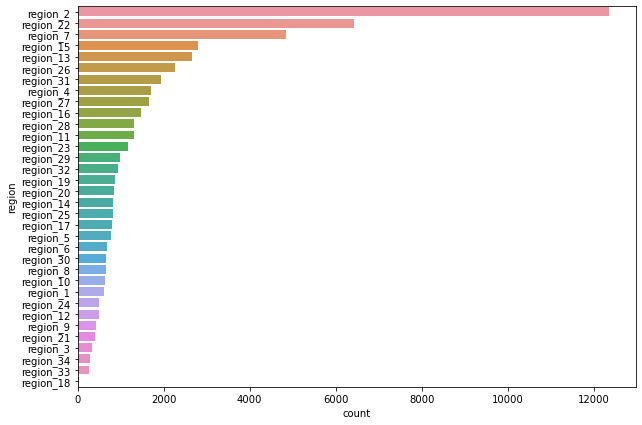

In [12]:
# Evaluate distribution of region column values using countplot

plt.figure(figsize=(10,7))
sns.countplot(y=df_train['region'],order=df_train['region'].value_counts().index)

- Maximum no of employees belongs to region 2

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

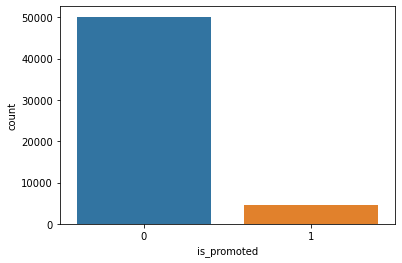

In [13]:
# Evaluate distribution of target column 'is_promoted'column values using countplot

sns.countplot(x=df_train['is_promoted'])

In [14]:
print("% of employees promoted last year:",round((df_train['is_promoted'].value_counts()[1]/len(df_train)*100),2),'%')

% of employees promoted last year: 8.52 %


### - We can confirm from above comparison our data is imbalaced

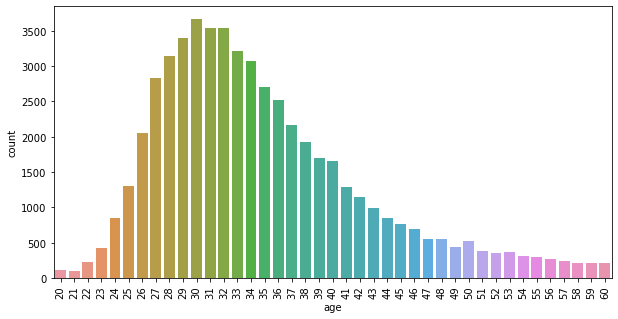

In [15]:
## Evaluate distribution of age column values using countplot

plt.figure(figsize=(10,5))
sns.countplot(x=df_train['age'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

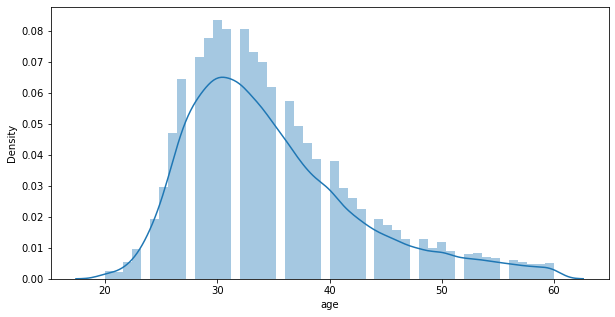

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df_train['age'])

### Majority of the employees are in 27-34
### The age column is rightly skewed

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

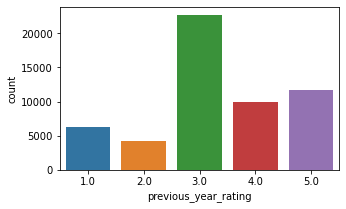

In [17]:
# Previous year rating column distribution

plt.figure(figsize=(5,3))
sns.countplot(x=df_train['previous_year_rating'])


### From above graph we can confirm majority of the employess has got 3 rating

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

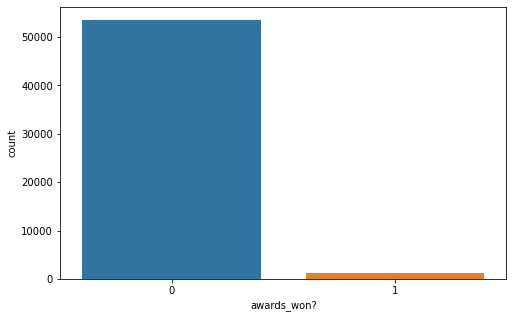

In [18]:
# Validate award won distribution using countplot

plt.figure(figsize=(8,5))
sns.countplot(x=df_train['awards_won?'])

In [19]:
print("% of employees won the awards last year:",round((df_train['awards_won?'].value_counts()[1]/len(df_train)*100),2),'%')

% of employees won the awards last year: 2.32 %


### Performing Bi-variate analysis

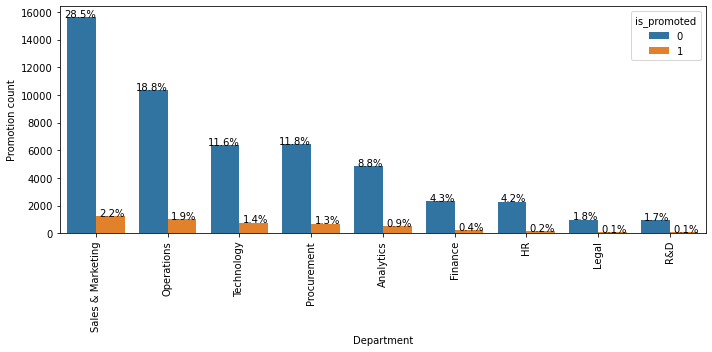

In [20]:
# Department wise promotion distribution

plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_train,x='department',hue='is_promoted',
                order=df_train['department'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Promotion count')
plt.xlabel('Department')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.tight_layout()
plt.show()

- More promotions are from Sales & Marketing, operations departments followed by Technology & Procurement

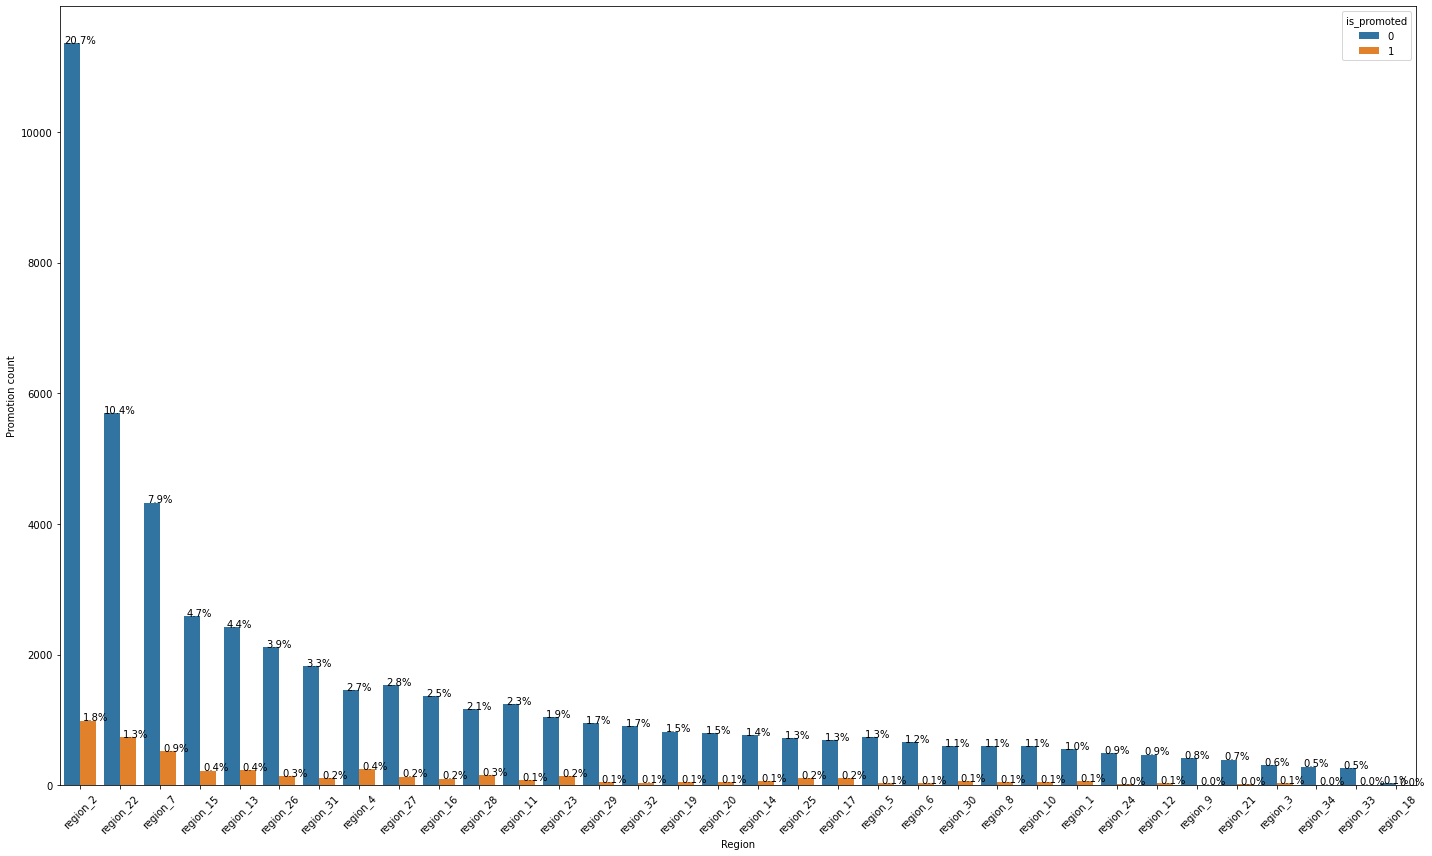

In [21]:
# region wise promotion distribution

plt.figure(figsize=(20,12))
ax=sns.countplot(data=df_train,x='region',hue='is_promoted',
                order=df_train['region'].value_counts().index)
plt.xticks(rotation=45)
plt.ylabel('Promotion count')
plt.xlabel('Region')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_train))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.tight_layout()
plt.show()

From the above plot, we can observe that,
- promotion rate is highest in region_2 i.e. 1.8 %
- Least promotion rate belongs to region_18

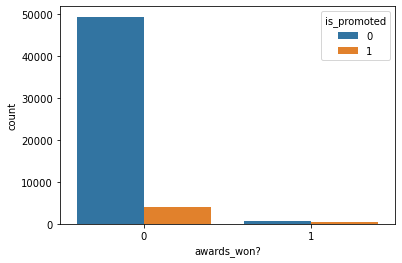

In [22]:
# Impact of awards on promotion
sns.countplot(x='awards_won?',data=df_train, hue='is_promoted')
plt.show()

- From the above plot, we can observe that if any employee gets awards chances of getting promoted is high 

### Multi-variate analysis

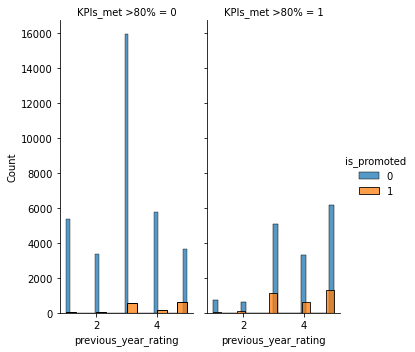

In [23]:
g = sns.FacetGrid(df_train,col="KPIs_met >80%",height=5,aspect=.5, hue='is_promoted')
g.map(sns.histplot,'previous_year_rating')
g.add_legend()
plt.show()

- From the above plot, we can observe that if more than 80% KPIs are meet & previous_year_rating is high chances of employee getting promoted are more

In [24]:
# understanding Correlation

df_train.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


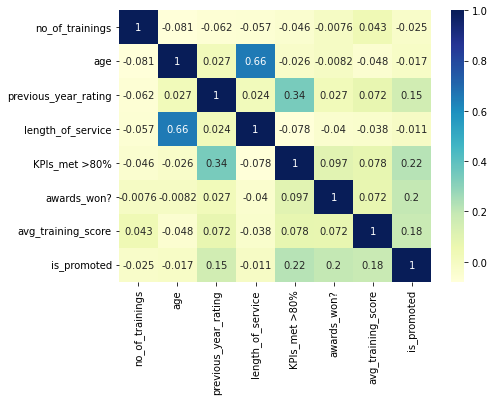

In [25]:
# Correlation heat map

ax = plt.subplots(figsize=(7, 5))
ax=sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

From the above heatmap & correlation matrix,
- There is strong positive correlation between 'awards_won'(0.2) and 'is_promoted' which indicates that the employees getting awards are more likely to get promotions
- There is strong positive correlation between 'KPIs_met >80%'(0.22) and 'is_promoted' which indicates that the employees who are meeting more than 80% of KPIs have higher chances of promotion
- we can observe that there is mild positive corelation between 'previous_year_rating'(0.15) & 'avg_training_score'(0.18) with 'is_promoted', which indicates that 
- higher the 'previous_year_rating' score , there are more chances of promotion
- higher the 'avg_training_score', there are more chances of promotion
- length_of_service & age have strong positive correlation(0.66), which indicates older employees are more likely to stay with the organization
- 'KPIs_met >80%'	and 'previous_year_rating' are highly correlated(0.34), which indicates that employees achieving more than 80% KPIs has also got higher performance ratings 

### Visualizing outliers

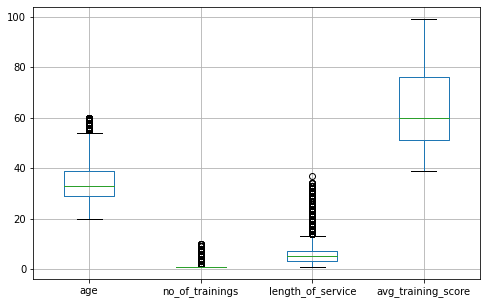

In [26]:
# Outliers in contineous variables

plt.figure(figsize=(8,5))
df_train.boxplot(column=['age','no_of_trainings','length_of_service','avg_training_score'])
#plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

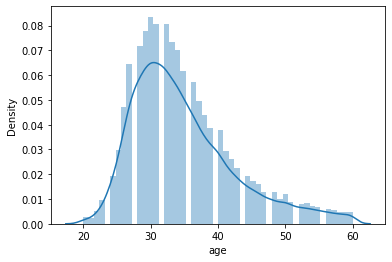

In [27]:
# Distribution of 'age' column

sns.distplot(df_train['age'])

- 'age' column is Normally distrbuted
- Using 3 standard deviation to treat outliers

In [28]:
#As normally distributed

uppper_boundary=df_train['age'].mean() + 3* df_train['age'].std()
lower_boundary=df_train['age'].mean() - 3* df_train['age'].std()
print(lower_boundary), print(uppper_boundary),print(df_train['age'].mean())

11.82340788203259
57.784423091547914
34.80391548679025


(None, None, None)

In [29]:
df_train.loc[df_train['age']>=58,'age']=58

<AxesSubplot:xlabel='age', ylabel='Density'>

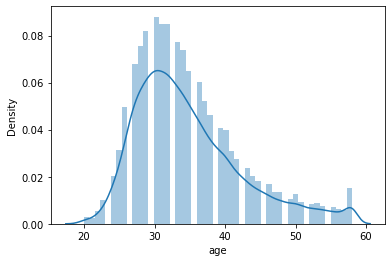

In [30]:
sns.distplot(df_train['age'])

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

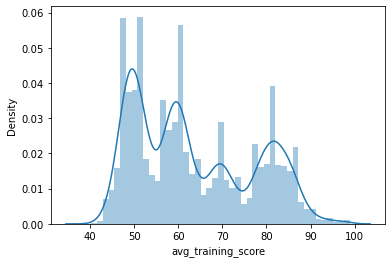

In [31]:
# Distribution of 'avg_training_score'

sns.distplot(df_train['avg_training_score'])

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64


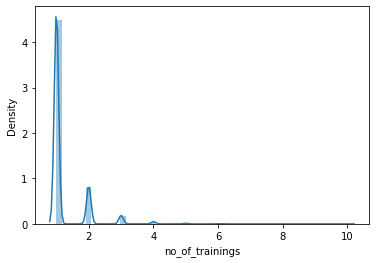

In [32]:
# Distribution of 'no_of_trainings'

sns.distplot(df_train['no_of_trainings'])
print(df_train['no_of_trainings'].value_counts())

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64


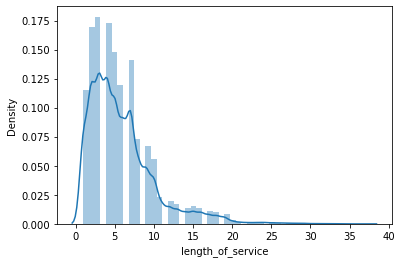

In [33]:
# Distribution of 'length_of_service'

sns.distplot(df_train['length_of_service'])
print(df_train['length_of_service'].value_counts())

### 'no_of_trainings','length_of_service','avg_training_score' have outliers but could have useful information. Hence, not treating them

### Converting categorical data into numeric

In [34]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [35]:
df_train['region'].value_counts().to_dict()

{'region_2': 12343,
 'region_22': 6428,
 'region_7': 4843,
 'region_15': 2808,
 'region_13': 2648,
 'region_26': 2260,
 'region_31': 1935,
 'region_4': 1703,
 'region_27': 1659,
 'region_16': 1465,
 'region_28': 1318,
 'region_11': 1315,
 'region_23': 1175,
 'region_29': 994,
 'region_32': 945,
 'region_19': 874,
 'region_20': 850,
 'region_14': 827,
 'region_25': 819,
 'region_17': 796,
 'region_5': 766,
 'region_6': 690,
 'region_30': 657,
 'region_8': 655,
 'region_10': 648,
 'region_1': 610,
 'region_24': 508,
 'region_12': 500,
 'region_9': 420,
 'region_21': 411,
 'region_3': 346,
 'region_34': 292,
 'region_33': 269,
 'region_18': 31}

In [36]:
region_mapped=df_train['region'].value_counts().to_dict()

# Mapping the 'region' column to numeric values
df_train['region']=df_train['region'].map(region_mapped)
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,4843,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,6428,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,874,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,1175,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,2260,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [37]:
df_train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [38]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'department'
df_train['department']= label_encoder.fit_transform(df_train['department'])

df_train['department'].unique()

array([7, 4, 8, 0, 6, 5, 1, 2, 3])

In [39]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,4843,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,4,6428,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7,874,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,7,1175,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,8,2260,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [40]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [41]:
df_train['education']=df_train['education'].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [42]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,4843,3,f,sourcing,1,35,5.0,8,1,0,49,0
1,4,6428,2,m,other,1,30,5.0,4,0,0,60,0
2,7,874,2,m,sourcing,1,34,3.0,7,0,0,50,0
3,7,1175,2,m,other,2,39,1.0,10,0,0,50,0
4,8,2260,2,m,other,1,45,3.0,2,0,0,73,0


In [43]:
df_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [44]:
df_train['gender'].unique()

array(['f', 'm'], dtype=object)

In [45]:
# Using one-hot coding
df_train=pd.get_dummies(df_train,drop_first=True)
df_train.head()

# All catgoricals are converted into numerics

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,7,4843,3,1,35,5.0,8,1,0,49,0,0,0,1
1,4,6428,2,1,30,5.0,4,0,0,60,0,1,0,0
2,7,874,2,1,34,3.0,7,0,0,50,0,1,0,1
3,7,1175,2,2,39,1.0,10,0,0,50,0,1,0,0
4,8,2260,2,1,45,3.0,2,0,0,73,0,1,0,0


In [46]:
df_train.columns

Index(['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [47]:
df_train=df_train[['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing', 'is_promoted']]

In [48]:
df_train.head(2)

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,7,4843,3,1,35,5.0,8,1,0,49,0,0,1,0
1,4,6428,2,1,30,5.0,4,0,0,60,1,0,0,0


### Scaling the data

In [49]:
# Separate Target Variable and Predictor Variables
y_train=df_train[['is_promoted']]
x_train=df_train.drop(['is_promoted'],axis=1)


In [50]:
y_train.value_counts()

is_promoted
0              50140
1               4668
dtype: int64

### - As we have observed that the data is imbalance hence we are overcoming Class Imbalance using SMOTE Techniques

In [51]:
# SMOTE technique

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)

In [52]:
y_train_sm.value_counts()

is_promoted
0              50140
1              50140
dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
# define min max scaler
minmax = MinMaxScaler()

# define standard scaler
sc = StandardScaler()

# define Robust scaler
Robust = RobustScaler()

# define MaxAbs scaler
MaxAbs = MaxAbsScaler()

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler


# transform data
min_max_train = minmax.fit_transform(x_train_sm)
min_max_train = pd.DataFrame(min_max_train)


# transform data
sc_train = sc.fit_transform(x_train_sm)
sc_train = pd.DataFrame(sc_train)



# transform data
Robust_train = Robust.fit_transform(x_train_sm)
Robust_train = pd.DataFrame(Robust_train)



# transform data
MaxAbs_train = MaxAbs.fit_transform(x_train_sm)
MaxAbs_train = pd.DataFrame(MaxAbs_train)


### Getting test data

In [55]:
df_test=pd.read_csv('Test_data.csv')
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [56]:
df_test.drop('employee_id',axis=1,inplace=True)
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [58]:
# checking missing value

df_test.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [59]:
# 'education' is categorical variable, so we will impute the missing values with mode

df_test['education'].fillna(df_test.education.mode()[0], inplace=True)

# 'previous_year_rating' is a categorical, ordinal column having values 1,2,3,4,5, using mode to replace the missing values

df_test['previous_year_rating'].fillna(df_test.previous_year_rating.mode()[0],inplace=True)


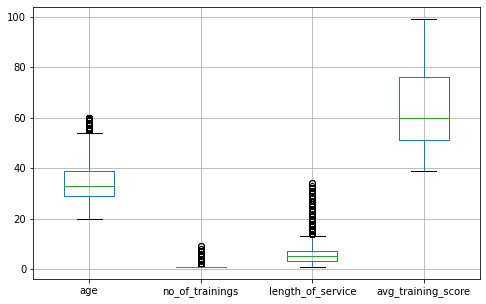

In [60]:
# Outliers in contineous variables

plt.figure(figsize=(8,5))
df_test.boxplot(column=['age','no_of_trainings','length_of_service','avg_training_score'])
#plt.xticks(rotation=45)
plt.show()


<AxesSubplot:xlabel='age', ylabel='Density'>

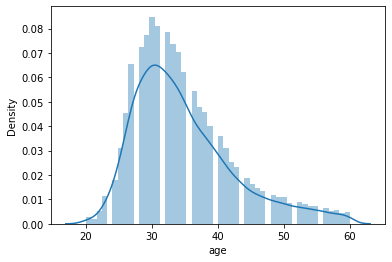

In [61]:
# Distribution of 'age' column

sns.distplot(df_test['age'])

In [62]:
#As normally distributed

uppper_boundary=df_test['age'].mean() + 3* df_test['age'].std()
lower_boundary=df_test['age'].mean() - 3* df_test['age'].std()
print(lower_boundary), print(uppper_boundary),print(df_test['age'].mean())


11.7444542640425
57.821403547792315
34.78292890591741


(None, None, None)

<AxesSubplot:xlabel='age', ylabel='Density'>

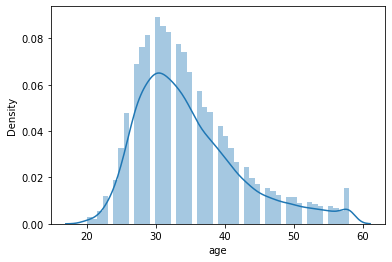

In [63]:
df_test.loc[df_test['age']>=58,'age']=58
sns.distplot(df_test['age'])

### Converting categorical data into numeric

In [64]:

# Mapping the 'region' column to numeric values
df_test['region']=df_test['region'].map(region_mapped)
df_test.head()

# Encode labels in column 'department'
df_test['department']= label_encoder.fit_transform(df_test['department'])

# Mapping the 'education' column to numeric values
df_test['education']=df_test['education'].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})


# Using one-hot coding
df_test=pd.get_dummies(df_train,drop_first=True)
df_test.head()

# All catgoricals are converted into numerics

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,7,4843,3,1,35,5.0,8,1,0,49,0,0,1,0
1,4,6428,2,1,30,5.0,4,0,0,60,1,0,0,0
2,7,874,2,1,34,3.0,7,0,0,50,1,0,1,0
3,7,1175,2,2,39,1.0,10,0,0,50,1,0,0,0
4,8,2260,2,1,45,3.0,2,0,0,73,1,0,0,0


In [65]:
# Separate Target Variable and Predictor Variables from test data
y_test=df_test[['is_promoted']]
x_test=df_test.drop(['is_promoted'],axis=1)

In [66]:
y_test.value_counts()

is_promoted
0              50140
1               4668
dtype: int64

In [67]:
# using SMOTE for classifying imbalance

sm=SMOTE()
x_test_sm,y_test_sm=sm.fit_resample(x_test,y_test)

In [68]:
y_test_sm.value_counts()

is_promoted
0              50140
1              50140
dtype: int64

In [69]:

# transform data
min_max_test = minmax.fit_transform(x_test_sm)
min_max_test = pd.DataFrame(min_max_test)


# transform data
sc_test = sc.fit_transform(x_test_sm)
sc_test = pd.DataFrame(sc_test)


# transform data
Robust_test = Robust.fit_transform(x_test_sm)
Robust_test = pd.DataFrame(Robust_test)



# transform data
MaxAbs_test = MaxAbs.fit_transform(x_test_sm)
MaxAbs_test = pd.DataFrame(MaxAbs_test)

### Creating  model

In [70]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## Creating XGBoost model

In [71]:
#creating model object
model_xgboost = XGBClassifier(random_state=42)


# fit model using min max scaler
model_xgboost.fit(min_max_train, y_train_sm)

# make predictions for test data
y_pred = model_xgboost.predict(min_max_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of XGBoost model using min_max scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('                                                           ')


# fit model using std scaler
model_xgboost.fit(sc_train, y_train_sm)

# make predictions for test data
y_pred = model_xgboost.predict(sc_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of XGBoost model using standard scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

# fit model using Robust Scaled
model_xgboost.fit(Robust_train, y_train_sm)

# make predictions for test data
y_pred = model_xgboost.predict(Robust_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of XGBoost model using robust scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

# fit model Max abs scaled
model_xgboost.fit(MaxAbs_train, y_train_sm)

# make predictions for test data
y_pred = model_xgboost.predict(MaxAbs_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of XGBoost model using MaxAbs scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

Accuracy of XGBoost model using min_max scalling: 92.82%
-----------------------------------------------------------
Confusion Matrix:
[[47073  3067]
 [ 4130 46010]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     50140
           1       0.94      0.92      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280

-----------------------------------------------------------
-----------------------------------------------------------
                                                           
Accuracy of XGBoost model using standard scalling: 64.04%
-----------------------------------------------------------
Confusion Matrix:
[[15682 34458]
 [ 1605 48535]]
-----------------------------------------------------------
              precision    recall  f1-sc

roc_auc score: 0.9282309533306741


Text(0, 0.5, 'True Positive Rate')

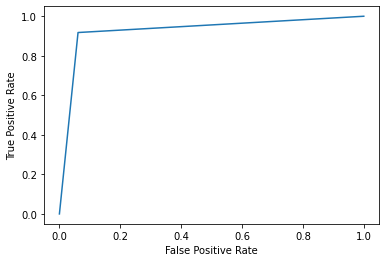

In [72]:
# Plotting ROC Curve & getting score
from sklearn.metrics import roc_curve, auc,roc_auc_score
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(y_test_sm, predictions)
roc_auc = roc_auc_score(y_test_sm, predictions)
print("roc_auc score:",roc_auc)
sns.lineplot(false_positive_rate1, true_positive_rate1)
plt.xticks
plt.yticks
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### - Accuracy of XGBoost model using min_max scalling: 92.54%
### - Accuracy of XGBoost model using standard scalling: 65.67%
### - Accuracy of XGBoost model using Robust scalling: 58.39%
### - Accuracy of XGBoost model using MaxAbs scalling: 92.54%
### - ROC-AUC score is 92.54

### Creating catboost model

In [73]:
model_catboost = CatBoostClassifier(random_state=42)

# fit model using min max scaling
model_catboost.fit(min_max_train, y_train_sm)

# make predictions for test data
y_pred = model_catboost.predict(min_max_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy_min_max = accuracy_score(y_test_sm, predictions)



# fit model using standard scaling
model_catboost.fit(sc_train, y_train_sm)

# make predictions for test data
y_pred = model_catboost.predict(sc_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy_std = accuracy_score(y_test_sm, predictions)



# fit model using Robust scaling
model_catboost.fit(Robust_train, y_train_sm)

# make predictions for test data
y_pred = model_catboost.predict(Robust_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy_Robust = accuracy_score(y_test_sm, predictions)


# fit model using max abs scaling
model_catboost.fit(MaxAbs_train, y_train_sm)

# make predictions for test data
y_pred = model_catboost.predict(MaxAbs_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy_MaxAbs = accuracy_score(y_test_sm, predictions)

Learning rate set to 0.073697
0:	learn: 0.6099559	total: 186ms	remaining: 3m 5s
1:	learn: 0.5654907	total: 210ms	remaining: 1m 44s
2:	learn: 0.5350069	total: 230ms	remaining: 1m 16s
3:	learn: 0.5137762	total: 250ms	remaining: 1m 2s
4:	learn: 0.4772498	total: 269ms	remaining: 53.6s
5:	learn: 0.4595615	total: 308ms	remaining: 51.1s
6:	learn: 0.4469926	total: 328ms	remaining: 46.5s
7:	learn: 0.4214037	total: 347ms	remaining: 43s
8:	learn: 0.4127825	total: 367ms	remaining: 40.5s
9:	learn: 0.4028400	total: 392ms	remaining: 38.8s
10:	learn: 0.3919266	total: 416ms	remaining: 37.4s
11:	learn: 0.3867186	total: 437ms	remaining: 36s
12:	learn: 0.3825323	total: 459ms	remaining: 34.8s
13:	learn: 0.3767839	total: 481ms	remaining: 33.8s
14:	learn: 0.3724187	total: 502ms	remaining: 32.9s
15:	learn: 0.3627218	total: 525ms	remaining: 32.3s
16:	learn: 0.3585686	total: 546ms	remaining: 31.6s
17:	learn: 0.3558929	total: 568ms	remaining: 31s
18:	learn: 0.3480950	total: 596ms	remaining: 30.8s
19:	learn: 0.34

In [74]:
print("Accuracy of catboost model using min_max scalling: %.2f%%" % (accuracy_min_max * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print("Accuracy of catboost model using standard scalling: %.2f%%" % (accuracy_std * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print("Accuracy of catboost model using robust scalling: %.2f%%" % (accuracy_Robust * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print("Accuracy of catboost model using MaxAbs scalling: %.2f%%" % (accuracy_MaxAbs * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

Accuracy of catboost model using min_max scalling: 93.15%
-----------------------------------------------------------
Confusion Matrix:
[[47341  2799]
 [ 4072 46068]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     50140
           1       0.94      0.92      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280

-----------------------------------------------------------
-----------------------------------------------------------
Accuracy of catboost model using standard scalling: 72.74%
-----------------------------------------------------------
Confusion Matrix:
[[47341  2799]
 [ 4072 46068]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93

roc_auc score: 0.9314818508177104


Text(0, 0.5, 'True Positive Rate')

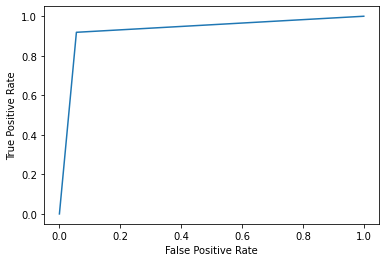

In [75]:
# Plotting ROC Curve & getting score
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test_sm, predictions)
roc_auc = roc_auc_score(y_test_sm, predictions)
print("roc_auc score:",roc_auc)
sns.lineplot(false_positive_rate2, true_positive_rate2)
plt.xticks
plt.yticks
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### - Accuracy of CatBoost model using min_max scalling: 93.15%
### - Accuracy of CatBoost model using standard scalling: 73.78%
### - Accuracy of CatBoost model using Robust scalling: 69%
### - Accuracy of CatBoost model using MaxAbs scalling: 93.15%
### - ROC-AUC is 93.12%

### Creating LightGBM model

In [76]:
model_LGBMC = LGBMClassifier(random_state=42)

# fit model using min max scaler
model_LGBMC.fit(min_max_train, y_train_sm)

# make predictions for test data
y_pred = model_LGBMC.predict(min_max_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of LightGBM model using min_max scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

# fit model using standard scaler
model_LGBMC.fit(sc_train, y_train_sm)

# make predictions for test data
y_pred = model_LGBMC.predict(sc_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of LightGBM model using std scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

# fit model using standard scaler
model_LGBMC.fit(Robust_train, y_train_sm)

# make predictions for test data
y_pred = model_LGBMC.predict(Robust_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of LightGBM model using robust scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')


# fit model max abs scaler
model_LGBMC.fit(MaxAbs_train, y_train_sm)

# make predictions for test data
y_pred = model_LGBMC.predict(MaxAbs_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_sm, predictions)
print("Accuracy of LightGBM model using MaxAbs scalling: %.2f%%" % (accuracy * 100.0))
print('-----------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test_sm, predictions))
print('-----------------------------------------------------------')
print(classification_report(y_test_sm, predictions))
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')

Accuracy of LightGBM model using min_max scalling: 90.66%
-----------------------------------------------------------
Confusion Matrix:
[[46378  3762]
 [ 5603 44537]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     50140
           1       0.92      0.89      0.90     50140

    accuracy                           0.91    100280
   macro avg       0.91      0.91      0.91    100280
weighted avg       0.91      0.91      0.91    100280

-----------------------------------------------------------
-----------------------------------------------------------
Accuracy of LightGBM model using std scalling: 60.57%
-----------------------------------------------------------
Confusion Matrix:
[[12600 37540]
 [ 1998 48142]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.25      0.39     

roc_auc score: 0.9082867969684882


Text(0, 0.5, 'True Positive Rate')

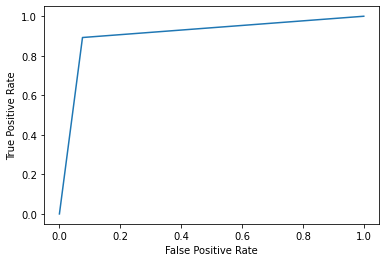

In [77]:
# Plotting ROC Curve & getting score
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(y_test_sm, predictions)
roc_auc = roc_auc_score(y_test_sm, predictions)
print("roc_auc score:",roc_auc)
sns.lineplot(false_positive_rate3, true_positive_rate3)
plt.xticks
plt.yticks
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### - Accuracy of LightGBM  model using min_max scalling: 90.84%
### - Accuracy of LightGBM  model using standard scalling: 84.87%
### - Accuracy of LightGBM  model using Robust scalling: 54.78%
### - Accuracy of LightGBM  model using MaxAbs scalling: 90.71%
### - ROC-AUC is 90.70%

## From the above observation we can say Catboost is the best performing model
## Accuracy of CatBoost model using min_max or Max Absolute scalling: 93.13%
## ROC-AUC is 93.12%

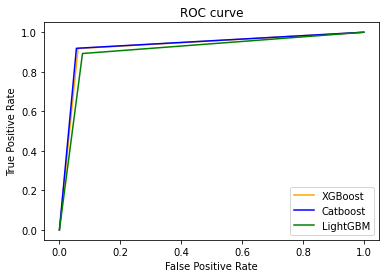

In [78]:
# Plotting the ROC curves for comparision
sns.lineplot(false_positive_rate1, true_positive_rate1,color='orange',label='XGBoost')
sns.lineplot(false_positive_rate2, true_positive_rate2,color='blue', label='Catboost')
sns.lineplot(false_positive_rate3, true_positive_rate3,color='green', label='LightGBM')
plt.xticks
plt.yticks
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()